# Data Wrangling 

https://www.kaggle.com/datasets/harlfoxem/housesalesprediction

- This dataset contains house sale prices for King County, Seattle. 
- It includes homes sold between May 2014 and May 2015.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Data Inspection:

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [30]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [31]:
for column in data.columns:
    print(f"First 5 rows of column '{column}':")
    print(data[column].head())
    print("\n")

First 5 rows of column 'id':
0    7129300520
1    6414100192
2    5631500400
3    2487200875
4    1954400510
Name: id, dtype: int64


First 5 rows of column 'date':
0    20141013T000000
1    20141209T000000
2    20150225T000000
3    20141209T000000
4    20150218T000000
Name: date, dtype: object


First 5 rows of column 'price':
0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64


First 5 rows of column 'bedrooms':
0    3
1    3
2    2
3    4
4    3
Name: bedrooms, dtype: int64


First 5 rows of column 'bathrooms':
0    1.00
1    2.25
2    1.00
3    3.00
4    2.00
Name: bathrooms, dtype: float64


First 5 rows of column 'sqft_living':
0    1180
1    2570
2     770
3    1960
4    1680
Name: sqft_living, dtype: int64


First 5 rows of column 'sqft_lot':
0     5650
1     7242
2    10000
3     5000
4     8080
Name: sqft_lot, dtype: int64


First 5 rows of column 'floors':
0    1.0
1    2.0
2    1.0
3    1.0
4    1.0
Name: floors, dtype: float64

In [32]:
# convert 'date' column to a standard date format
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

data['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

In [33]:
# unique values and counts in the 'bathrooms' column
data['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

1.5 Bathrooms:

The partial component of the second bathroom could include a toilet and a sink, but it may not include a bathtub or shower.

1.75 Bathrooms:

This partial component might include a toilet, a sink, and a shower, but it may not include a bathtub.

In [34]:
# unique values and counts in the 'floors' column
data['floors'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

The partial floor is often located within the upper level of the property and may include rooms or living spaces that are under the sloped roof, such as attic rooms or loft spaces.

In [35]:
data['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [36]:
data['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

## Categorical variables: 

In [37]:
# columns to convert to categorical
data[['waterfront', 'view', 'condition', 'grade']] = data[['waterfront', 'view', 'condition', 'grade']].astype('category')

# Check the data types to verify the change
print(data.dtypes)

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront             category
view                   category
condition              category
grade                  category
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object


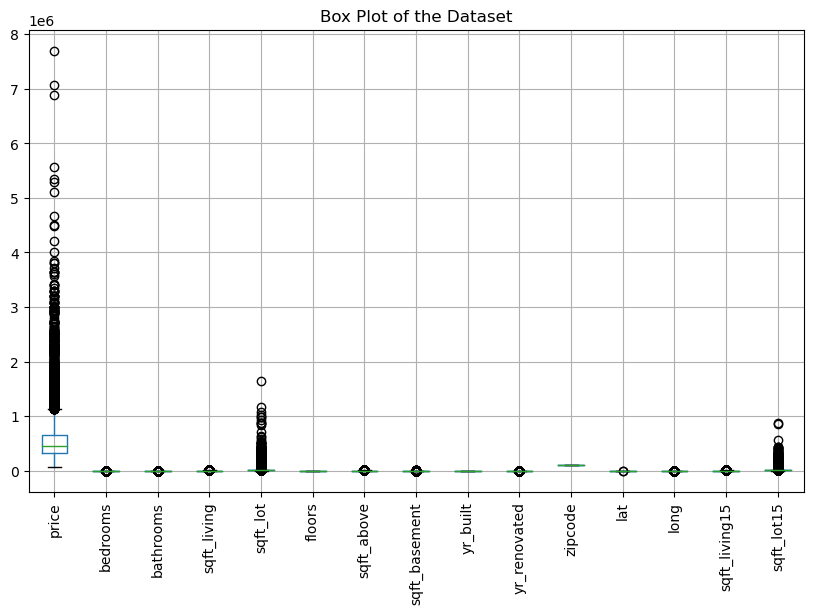

In [38]:
# drop the 'id' column from the dataset
data_for_boxplot = data.drop(columns=['id'])

# box plot 
plt.figure(figsize=(10, 6))
data_for_boxplot.boxplot()
plt.title("Box Plot of the Dataset")
plt.xticks(rotation=90)
plt.show()

## Logarithmic Transformation: (variables containing price and sqft)

In [39]:
data['log_price'] = np.log(data['price'])

In [40]:
data['log_sqft_lot'] = np.log(data['sqft_lot'])

In [41]:
data['log_sqft_lot15'] = np.log(data['sqft_lot15'])

In [42]:
data['log_sqft_living'] = np.log(data['sqft_living'])

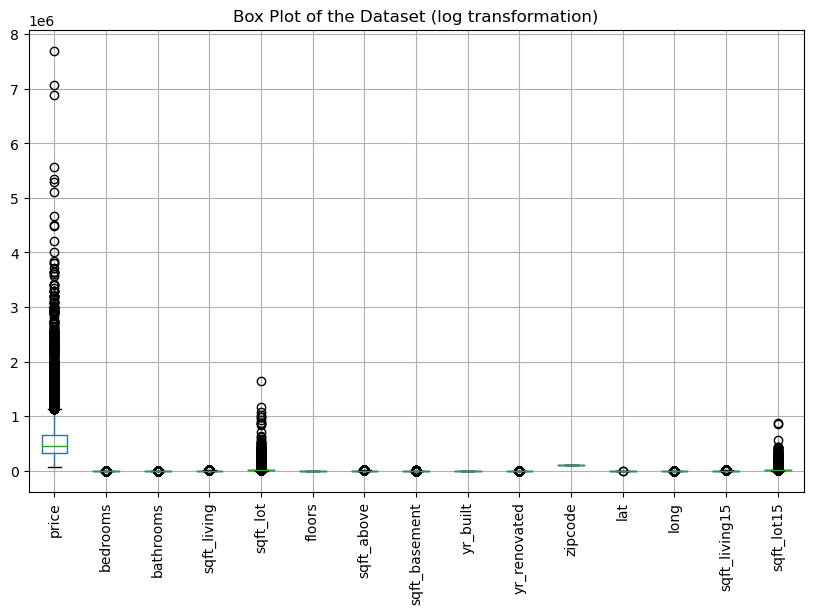

In [43]:
# box plot for the modified dataset
plt.figure(figsize=(10, 6))
data_for_boxplot.boxplot()
plt.title("Box Plot of the Dataset (log transformation)")
plt.xticks(rotation=90)
plt.show()

In [44]:
data.dtypes

id                          int64
date               datetime64[ns]
price                     float64
bedrooms                    int64
bathrooms                 float64
sqft_living                 int64
sqft_lot                    int64
floors                    float64
waterfront               category
view                     category
condition                category
grade                    category
sqft_above                  int64
sqft_basement               int64
yr_built                    int64
yr_renovated                int64
zipcode                     int64
lat                       float64
long                      float64
sqft_living15               int64
sqft_lot15                  int64
log_price                 float64
log_sqft_lot              float64
log_sqft_lot15            float64
log_sqft_living           float64
dtype: object

In [45]:
# save the dataframe:
data.to_csv('clean_data.csv', index=False)